# Lab 3 Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
%matplotlib inline

## Working with Ensembles

In part 1, we'll work with the [CESM1 Large Ensemble (LENS)](https://www.cesm.ucar.edu/community-projects/lens), an ensemble of 34 climate simulations that all use the same underlying model. We've already downloaded some of this data into OSCAR; run the following cell to load it into your local memory. The files are stored in the DATA folder under DATA/CESM1-LENS. In this folder you will find several subfolder containing the simulations for


**HIST:** historical period from Jan 1920 - Dec 2005, monthly averages<br>
**RCP4.5:** a scenario of moderate to high increase in GHGs from Jan 2006 - Dec 2099, monthly averages<br>
**RCP8.5:** a scenario of high increase in GHGs from Jan 2006 - Dec 2099, monthly averages


In [2]:
hist_files = [
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/HIST/CESM1-LENS-HIST.1920-2005.ens-002.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/HIST/CESM1-LENS-HIST.1920-2005.ens-003.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/HIST/CESM1-LENS-HIST.1920-2005.ens-004.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/HIST/CESM1-LENS-HIST.1920-2005.ens-005.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/HIST/CESM1-LENS-HIST.1920-2005.ens-006.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/HIST/CESM1-LENS-HIST.1920-2005.ens-007.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/HIST/CESM1-LENS-HIST.1920-2005.ens-008.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/HIST/CESM1-LENS-HIST.1920-2005.ens-009.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/HIST/CESM1-LENS-HIST.1920-2005.ens-010.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/HIST/CESM1-LENS-HIST.1920-2005.ens-011.nc',
]
hist = xr.open_mfdataset(hist_files, concat_dim='member', combine='nested', decode_times=False)
hist

<xarray.Dataset> Size: 2GB
Dimensions:       (member: 10, time: 1032, lat: 192, lon: 288, ilev: 31,
                   lev: 30, nbnd: 2, slat: 191, slon: 288)
Coordinates:
  * ilev          (ilev) float64 248B 9.969e+36 9.969e+36 ... 9.969e+36
  * lat           (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev           (lev) float64 240B 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
  * lon           (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat          (slat) float64 2kB 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
  * slon          (slon) float64 2kB 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
  * time          (time) float64 8kB 31.0 59.0 90.0 ... 3.136e+04 3.139e+04
Dimensions without coordinates: member, nbnd
Data variables: (12/32)
    P0            (member) float64 80B 9.969e+36 9.969e+36 ... 9.969e+36
    TS            (member, time, lat, lon) float32 2GB dask.array<chunksize=(1, 1032, 192, 288), meta=np.ndarray>
    ch4vmr        (member, time) float64 83kB dask.array<chunksize=(1, 1032), meta=np.ndarray>
    co2vmr        (member, time) float64 83kB dask.array<chunksize=(1, 1032), meta=np.ndarray>
    date          (member, time) int32 41kB dask.array<chunksize=(1, 1032), meta=np.ndarray>
    date_written  (member, time) |S8 83kB dask.array<chunksize=(1, 1032), meta=np.ndarray>
    ...            ...
    ntrn          (member) int32 40B -2147483647 -2147483647 ... -2147483647
    sol_tsi       (member, time) float64 83kB dask.array<chunksize=(1, 1032), meta=np.ndarray>
    time_bnds     (member, time, nbnd) float64 165kB dask.array<chunksize=(1, 1032, 2), meta=np.ndarray>
    time_written  (member, time) |S8 83kB dask.array<chunksize=(1, 1032), meta=np.ndarray>
    w_stag        (member, slat) float64 15kB dask.array<chunksize=(1, 191), meta=np.ndarray>
    wnummax       (member, lat) int32 8kB dask.array<chunksize=(1, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.002
    title:                     UNSET
    logname:                   mai
    host:                      ys1329
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Tue Aug 13 11:27:07 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

<span style="color: blue; font-weight: bold;">Task 1:</span> Look through the above dataset and answer the following questions:

- How are the different members of the ensemble represented in the dataset?
- The `TS` variable records surface air temperature in Kelvins. Describe the model horizontal grid by examining this variable and the coordinates.

In this lab, we'll mostly be plotting this data on maps using the `cartopy` Python package. Read through the following example code to see how this works.

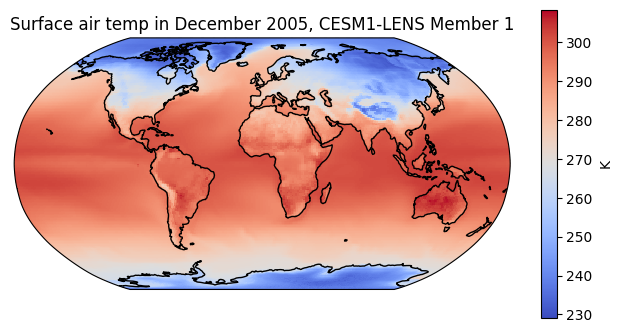

In [3]:
fig, ax = plt.subplots( # Make a figure for the plot
    figsize=[8, 4], # Set the size of the figure
    subplot_kw={'projection': ccrs.Robinson()}, # Use a Robinson map projection
)
hist.TS.sel(time=31390, member=1).plot( # Time is given in days since 1 Jan 1920
    ax=ax,
    x='lon', # Longitude is along the x-axis
    y='lat', # Latitude is along the y-axis
    transform=ccrs.PlateCarree(), # Indicates the data has latitude-longitude coordinates
    cmap='coolwarm', # Use a red-blue color scheme
    cbar_kwargs={'label': 'K'}, # Add a units label to the color bar
)
ax.set_title('Surface air temp in December 2005, CESM1-LENS Member 1')
ax.coastlines()
plt.show()

We will now learn how to plot the trend in air temperature over the time range of each ensemble member. To do this, we'll use a [linear regression](https://en.wikipedia.org/wiki/Linear_regression#/media/File:Linear_regression.svg) model, also called a line of best fit. In particular, for each ensemble member, we want to compute the linear regression of temperature versus time. The following function computes the slope of the linear regression, given a temperature array and an independent variable (in our case, time).

Linear regression is computing the coefficient `a` in the relationship `y = a*x`. It is computed as
$a = \frac{(x-\overline{x})(y-\overline{y})}{(x-\overline{x})^2}$ where $\overline{x}$ is the *mean* of $x$. Therefore, $(x-\overline{x})^2$ is the variance of $x$ and $(x-\overline{x})(y-\overline{y})$ is the covariance of $x$ and $y$.

In [4]:
def linear_regression(array, independent_variable):
    dim = independent_variable
    x_residual = array[dim] - array[dim].mean()
    y_residual = array - array.mean(dim)
    x_variance = (x_residual**2).mean()
    covariance = (x_residual * y_residual).mean(dim)
    a = covariance / x_variance
    return a

Now we can compute the trend in temperature by multiplying the slope of the linear regression by the length of the time interval:

In [5]:
time_delta = (hist.time[-1] - hist.time[0])
ensemble_trend = linear_regression(hist.TS, 'time') * time_delta
ensemble_trend = ensemble_trend.compute()

Next, we plot the temperature trend, putting each ensemble member on its own subplot:

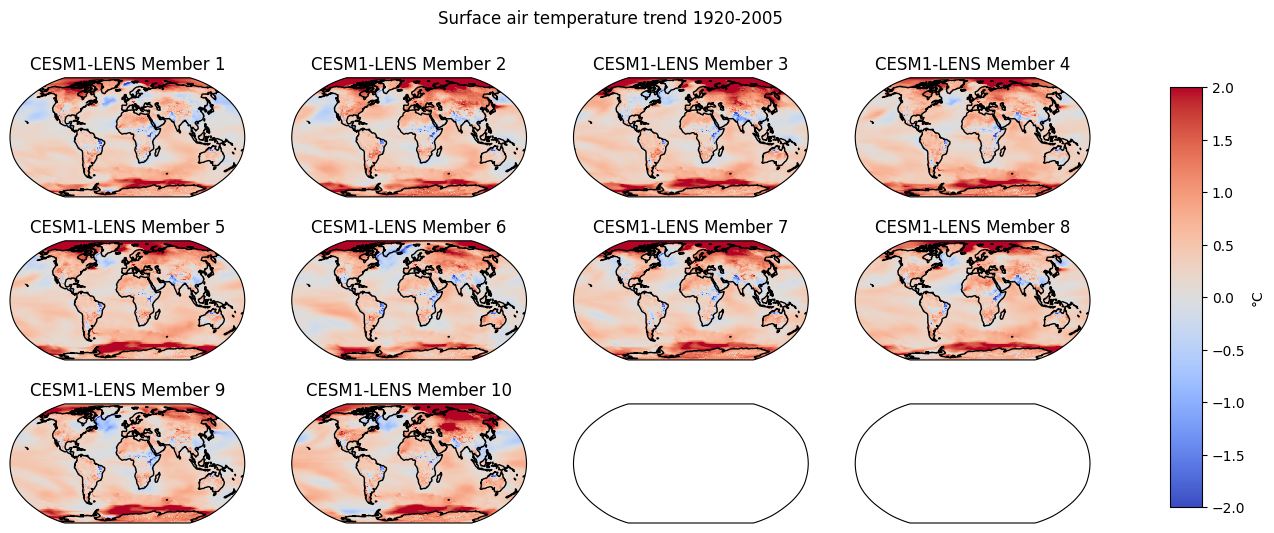

In [6]:
fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8], [ax9, ax10, ax11, ax12]) = plt.subplots(
    ncols=4, nrows=3, # Make a 4x3 grid of subplots
    figsize=[16, 6],
    subplot_kw={'projection': ccrs.Robinson()}
)
ensemble_axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10] # The first ten axes are for the ensemble members

fig.suptitle('Surface air temperature trend 1920-2005')
for n in range(10): # For each ensemble member n...
    ensemble_member = ensemble_trend.sel(member=n)
    colorplot = ensemble_member.plot(
        ax=ensemble_axes[n], # Plot on one of the first ten axes
        x='lon',
        y='lat',
        transform=ccrs.PlateCarree(),
        vmin=-2, # Set the minimum value of the color bar to -2°C
        vmax=2, # Set the maximum value of the color bar to 2°C
        cmap='coolwarm',
        add_colorbar=False,
    )
    ensemble_axes[n].coastlines()
    ensemble_axes[n].set_title(f'CESM1-LENS Member {n+1}')

# TO-DO: Plot observed temperature trend
observation_axes = [ax11, ax12]

# Add a single color bar to the entire plot
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(colorplot, cax=cbar_ax, label='°C')

plt.show()

<span style="color: blue; font-weight: bold;">Task 2:</span> Compute the ensemble mean trend at each location on the globe by averaging the trend across ensemble member.

<p>The ensemble mean trend \( \bar{X} \) is defined as:</p>
$$
\bar{X} = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

<ul>
    <li>\( \bar{X} \) represents the average trend across all ensemble members.</li>
    <li>\( N \) is the total number of ensemble members.</li>
    <li>\( X_i \) is the value of the trend for the \( i \)-th ensemble member.</li>
</ul>


<p>The ensemble spread at a given location of the grid \( S \) is defined as:</p>
$$
S(t) = \sqrt{\frac{1}{N} \sum_{i=1}^{N} \left( X_i - \bar{X} \right)^2}
$$

Using the ensemble mean, and the ensemble spread maps. Answer the following questions:
1. What regions show the largest trends?
2. Which regions show the largest uncertainties in the trends?
3. Is there a difference between land and ocean? Draw on concepts from class to explain why or why not.



In [1]:
# TO-DO create a global map of the ensemble mean trend and a global map of the ensemble spread

## Global Average Surface Temperature Timeseries

Next, we'll plot a time series of each ensemble member's global average temperature. First, we need to average over each year to remove seasonal variation:

In [15]:
# Average over the months in each year
yearly_hist_temp = hist.TS.groupby((hist.time - 1) // 365).mean()
# Historical data starts from the year 1920
yearly_hist_temp['time'] = yearly_hist_temp['time'] + 1920

Next, we average over the globe:

In [16]:
lon_resolution = hist.lon[1] - hist.lon[0] # degrees of longitude between grid cells
lat_resolution = hist.lat[1] - hist.lat[0] # degrees of latitude between grid cells
width_EW = 111200 * np.cos(np.deg2rad(hist.lat)) * lon_resolution # grid cell east-west width, in meters
width_NS = 111200 * lat_resolution # grid cell north-south width, in meters
area = width_EW * width_NS # grid cell area, in square meters

# TO-DO: Calculate global average air temperature
avg_hist_temp = ((yearly_hist_temp * area).sum('lat') / area.sum('lat')).mean('lon')
avg_hist_temp

<xarray.DataArray (member: 10, time: 86)> Size: 7kB
dask.array<mean_agg-aggregate, shape=(10, 86), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 688B 1.92e+03 1.921e+03 ... 2.004e+03 2.005e+03
Dimensions without coordinates: member

Lastly, we make a line plot for each ensemble member, as well as the ensemble average:

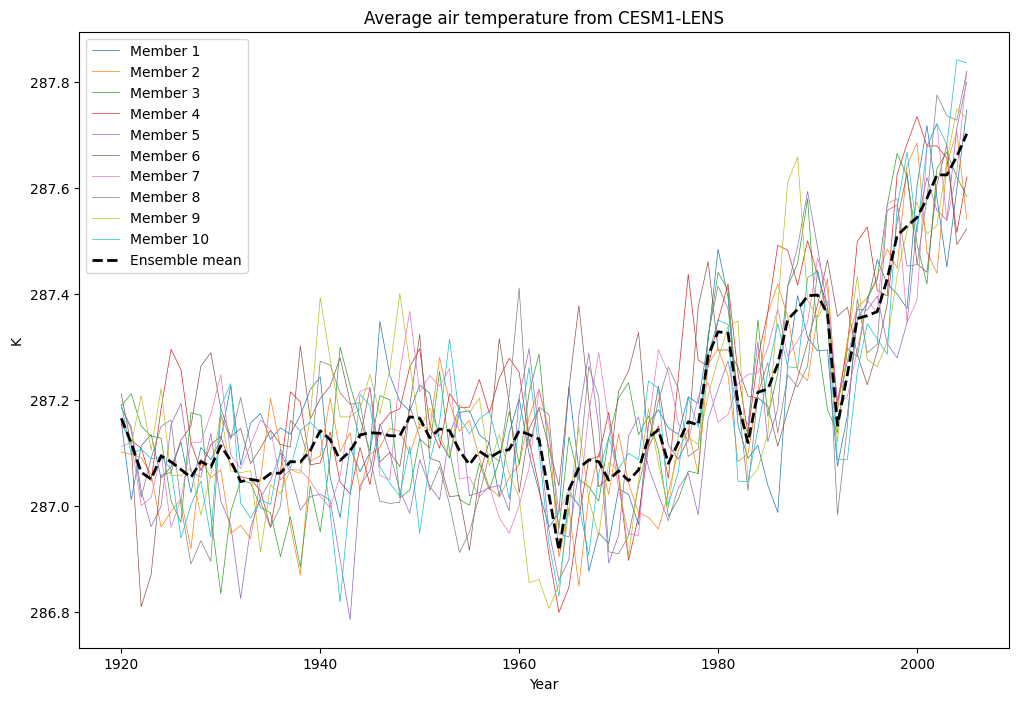

In [10]:
fig, ax = plt.subplots(figsize=[12, 8])
# Plot average air temperature for individual members
for n in range(10):
    avg_hist_temp.sel(member=n).plot(ax=ax, label=f'Member {n+1}', linewidth=0.5)
# Ensemble mean
avg_hist_temp.mean('member').plot(ax=ax, label='Ensemble mean', color='k', linestyle='--', linewidth=2)
plt.legend()

# TO-DO: Add labels to the axes
plt.xlabel('Year')
plt.ylabel('K')
plt.title('Average air temperature from CESM1-LENS')

plt.show()

Our CESM1-LENS data also includes future projections (2006-2100) for each ensemble member, which are loaded below for the **RCP8.5** scenario.

<span style="color: blue; font-weight: bold;">Task 3:</span> Now load the observational time series of globally averaged surface air temperature (TS) and superimpose the timeseries onto the ensemble plot you have just made. Do the observation fall within the ensemble spread?

You will find the Netcdf file with the observational reanalysis of TS in the DATA folder **NOAA-Reanalysis-TS.nc**

In [ ]:
# TO-DO load observations

In [ ]:
# TO-DO plot CESM air temperature and observational air temperature on the same plot

<span style="color: blue; font-weight: bold;">Task 4:</span> Make a new plot to extend the timeseries of global average surface temperatures to cover the period 1920-2100. You will need to combine the timeseries you computed for the previous plot (1920-2005) with the ones coming from the **RCP8.5**  projections (2006-2100). Below is a sample code showing you how to load the **RCP8.5** data files (similar to what you did for the historical period). Provide a brief description of what you see in the plot.

In [18]:
rcp85_files = [
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/RCP8.5/CESM1-LENS-RCP85.2006-2100.ens-002.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/RCP8.5/CESM1-LENS-RCP85.2006-2100.ens-003.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/RCP8.5/CESM1-LENS-RCP85.2006-2100.ens-004.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/RCP8.5/CESM1-LENS-RCP85.2006-2100.ens-005.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/RCP8.5/CESM1-LENS-RCP85.2006-2100.ens-006.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/RCP8.5/CESM1-LENS-RCP85.2006-2100.ens-007.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/RCP8.5/CESM1-LENS-RCP85.2006-2100.ens-008.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/RCP8.5/CESM1-LENS-RCP85.2006-2100.ens-009.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/RCP8.5/CESM1-LENS-RCP85.2006-2100.ens-010.nc',
    '/oscar/data/eeps1400_24fall/DATA/CESM1-LENS/RCP8.5/CESM1-LENS-RCP85.2006-2100.ens-011.nc',
]
rcp85 = xr.open_mfdataset(rcp85_files, concat_dim='member', combine='nested', decode_times=False)

# TO-DO: you need to compute the equivalent of avg_hist_temp, but for avg_rcp85_temp, 
# concatenate [avg_hist_temp, avg_rcp85_temp] and plot each member and the ensemble mean


## Signal to Noise Ratio (SNR)

<span style="color: blue; font-weight: bold;">Task 5:</span> Compute the value of the **SNR** between the mean temperature change 1920-1950 vs. 1980-2005. To do so, you will need to compute the following quantities. Consult the lecture notes if you need to refresh these concepts [class lecture (slide7)](https://drive.google.com/file/d/1-KanRKkXkHRKWj-AoYKjvXH12sd1d7Bd/view?usp=sharing)
<p><b>Mean Surface Temperature over the Reference Period</b></p>
<p>The mean surface temperature, \( \bar{T}_{\text{ref}} \), for the reference period (1920-1950) is defined as:</p>
$$
\bar{T}_{\text{ref}} = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{1}{M} \sum_{j=1}^{M} T_i(j) \right)
$$

<ul>
    <li>\( N \) is the number of ensemble members.</li>
    <li>\( T_i(j) \) is the surface temperature for the \( i \)-th ensemble member at record \( j \).</li>
    <li>\( M \) is the number of temperature records available within the reference period.</li>
</ul>

<p><b>Natural Variability (Ensemble Spread) over the Reference Period</b></p>
<p>The natural variability, \( S_{\text{ref}} \), is defined as the average ensemble spread over the reference period:</p>
$$
S_{\text{ref}} = \frac{1}{M} \sum_{j=1}^{M} \sqrt{\frac{1}{N} \sum_{i=1}^{N} \left( T_i(j) - \bar{T}(j) \right)^2}
$$

<ul>
    <li>\( \bar{T}(j) \) is the ensemble mean at record \( j \), defined as:</li>
</ul>
$$
\bar{T}(j) = \frac{1}{N} \sum_{i=1}^{N} T_i(j)
$$

<p><b>Ensemble Mean Temperature for the Period 1980-2005</b></p>
<p>The mean surface temperature, \( \bar{T}_{\text{1980-2005}} \), is computed as:</p>
$$
\bar{T}_{\text{1980-2005}} = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{1}{M_2} \sum_{j=1}^{M_2} T_i(j) \right)
$$

<ul>
    <li>\( M_2 \) is the number of temperature records available in the period 1980-2005.</li>
</ul>

<p><b>Signal-to-Noise Ratio (SNR)</b></p>
<p>The signal-to-noise ratio is defined as:</p>
$$
\text{SNR} = \frac{\bar{T}_{\text{1980-2005}} - \bar{T}_{\text{1920-1950}}}{S_{\text{ref}}}
$$

<ul>
    <li>\( \bar{T}_{\text{1920-1950}} \) is the mean temperature over the reference period 1920-1950.</li>
    <li>\( \bar{T}_{\text{1980-2005}} \) is the mean temperature over the period 1980-2005.</li>
    <li>\( S_{\text{ref}} \) is the natural variability computed over the reference period.</li>
</ul>



In [ ]:
# TO-DO compute signal to noise ratio and each location and plot a global map

## Time of Emergence (ToE) and Statstical Significance

<span style="color: blue; font-weight: bold;">Task 6:</span> We are now going to compute the **ToE** (see lecture notes for definition). To do so, we are going to use a time-dependent version of the SNR as follows:

<p><b>Time-Dependent Signal-to-Noise Ratio (SNR)</b></p>
<p>The signal-to-noise ratio for each year \( t \) after 1950 is defined as:</p>
$$
\text{SNR}(t) = \frac{\bar{T}(t) - \bar{T}_{\text{1920-1950}}}{S_{\text{ref}}}
$$

<ul>
    <li>\( \bar{T}(t) \) is the ensemble mean temperature for year \( t \).</li>
    <li>\( \bar{T}_{\text{1920-1950}} \) is the mean temperature over the reference period 1920-1950.</li>
    <li>\( S_{\text{ref}} \) is the natural variability (ensemble spread) computed over the reference period.</li>
</ul>

**Describe** what you see, and **find the ToE**. **Explain** (in around 150 words) what criteria you used to pin point the ToE.

In [ ]:
# TO-DO plot time of emergence